## INDIAN STARTUP

### Problem Statement
Possible questions which could be answered are: 1. How does the funding ecosystem change with time? 2.
Do cities play a major role in funding? 3. Which industries are favored by investors for funding? 4. Who are
the important investors in the Indian Ecosystem? 5. How much funds does startups generally get in India?

* ### <a href='#data'> Loading the Dataset </a>
* ### <a href='#eda'> Exploratory Data Analysis </a>
* ### <a href='#time'> How does the funding ecosystem change with time? </a>
* ### <a href='#city'> Do cities play a major role in funding? </a>
* ### <a href='#fund'> Which industries are favored by investors for funding? </a>
* ### <a href='#inv'> Who are the important investors in the Indian Ecosystem? </a>
* ### <a href='#usd'>  How much funds does startups generally get in India? </a>
* ### <a href='#inty'>  What type of Investment the Highest? </a>

In [3]:
# Future Imports
from __future__ import print_function, unicode_literals, absolute_import

# Data Cleaning/ Wrangling
from pandas import read_csv, DataFrame, get_dummies, to_datetime
import numpy as np
import itertools

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

<a id='data'></a>

In [4]:
%time
def load_dataset(filepath):
    ''' Loads the Dataset
        -------------
        Parameters: string
        -------------
        Return: dataframe
    '''
    filepath = './' +filepath+ '.csv'
    dataframe = read_csv(filepath)
    return dataframe

data = load_dataset('startup_funding')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10 µs


In [5]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN


<a id='eda'></a>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [7]:
data.describe(include=['O'])

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
count,2372,2372,2201,1436,2193,2364,2371,1525,419
unique,698,2001,743,1364,71,1885,7,328,69
top,02-02-2015,Swiggy,Consumer Internet,Online Pharmacy,Bangalore,Undisclosed Investors,Seed Funding,"10,00,000",Series A
freq,11,7,772,9,627,33,1271,130,177


<a id='time'></a>
### How does the funding ecosystem change with time?

In [8]:
data.Date[data.Date == '12/05.2015'] = '12-05-2015'
data.Date[data.Date == '13/04.2015'] = '13-04-2015'
data.Date[data.Date == '15/01.2015'] = '15-01-2015'
data.Date[data.Date == '22/01//2015'] = '22-01-2015'
data["year_month"] = (to_datetime(data.Date,format='%d-%m-%Y').dt.year*100) + \
                  (to_datetime(data.Date,format='%d-%m-%Y').dt.month)

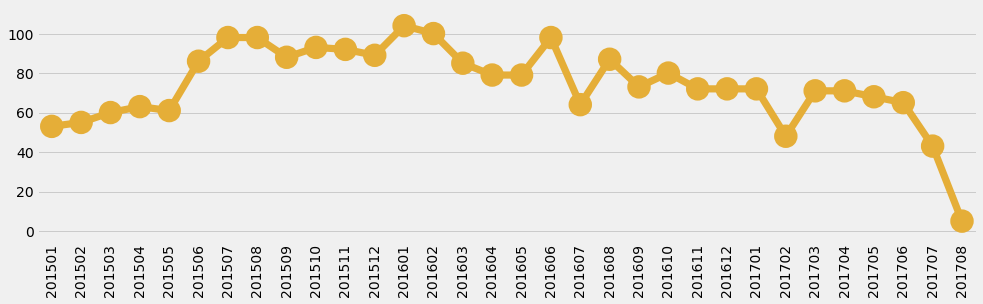

In [9]:
vc = data.year_month.value_counts()
fig = plt.figure(figsize=(15,4))
p = sns.pointplot(data=data, x=vc.index, y=vc.values, color=sns.color_palette()[2])
_ = plt.xticks(rotation='vertical')

<a id='city'></a>
### Do cities play a major role in funding?

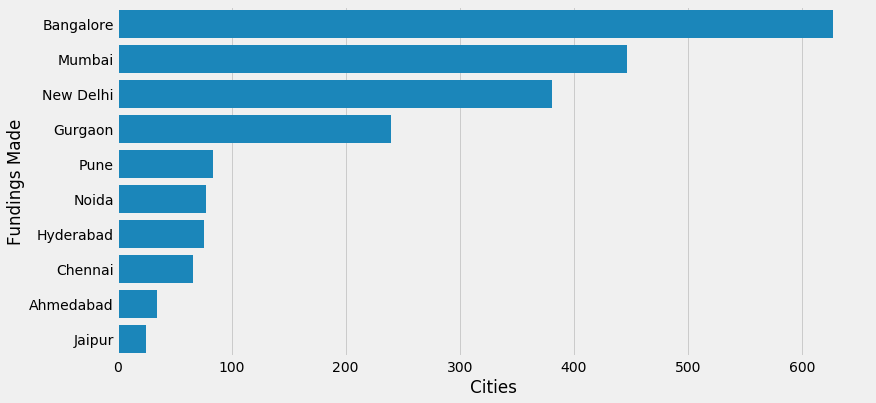

In [10]:
cities = data.CityLocation.value_counts()[0:10]
fig = plt.figure(figsize=(12,6))
p = sns.barplot(y=cities.index, x=cities.values, color=sns.color_palette()[0])
_ = p.set(xlabel='Cities', ylabel='Fundings Made')

<a id='fund'></a>
### Which industries are favored by investors for funding?

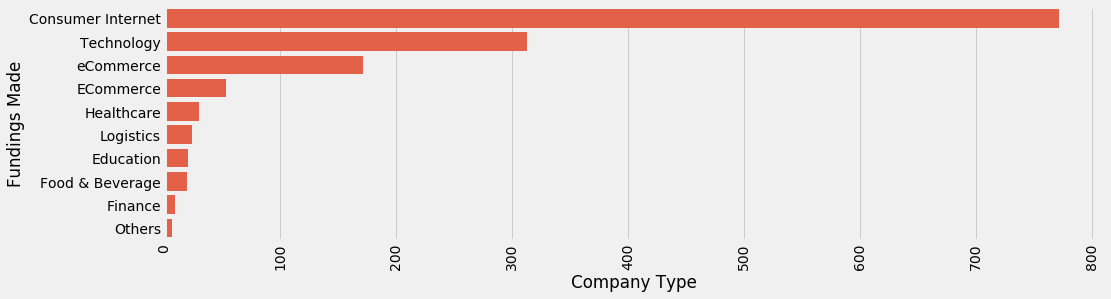

In [11]:
ind = data.IndustryVertical.value_counts()[0:10]
fig = plt.figure(figsize=(15,4))
p = sns.barplot(y=ind.index, x=ind.values, data=data, color=sns.color_palette()[1])
_ = p.set(xlabel='Company Type', ylabel='Fundings Made')
_ = plt.xticks(rotation='vertical')

<a id='inv'></a>
### Who are the important investors in the Indian Ecosystem?

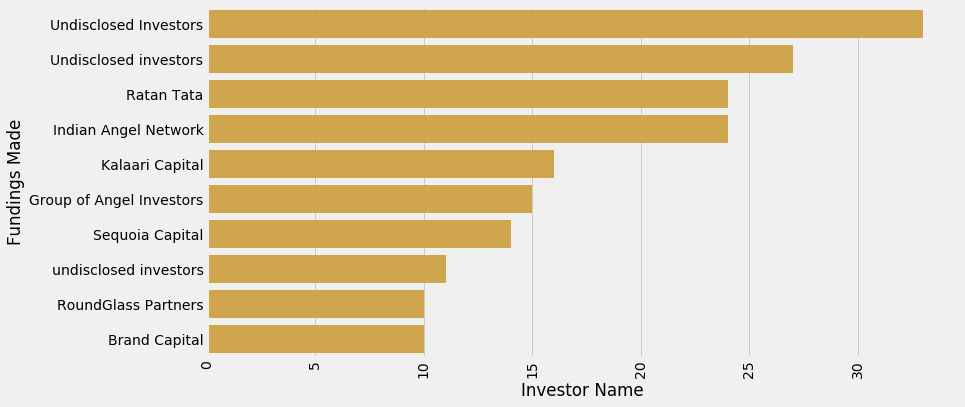

In [12]:
inv = data.InvestorsName.value_counts()[0:10]
fig = plt.figure(figsize=(12,6))
p = sns.barplot(y=inv.index, x=inv.values, color=sns.color_palette()[2])
_ = p.set(xlabel='Investor Name', ylabel='Fundings Made')
_ = plt.xticks(rotation='vertical')

<a id='usd'></a>
###  How much funds does startups generally get in India?

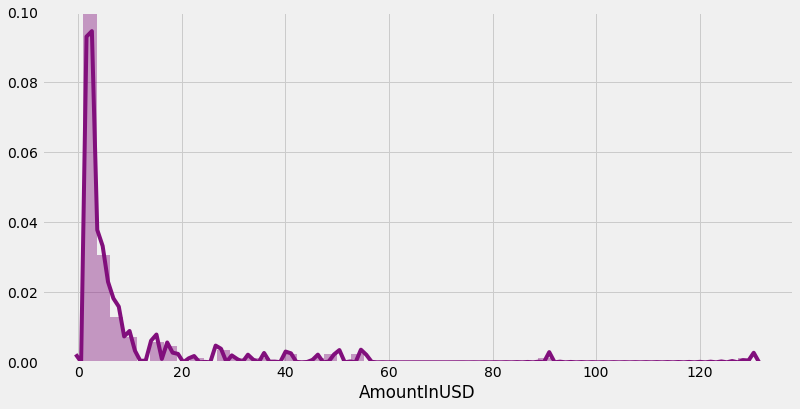

In [13]:
x = data.AmountInUSD.value_counts()
fig = plt.figure(figsize=(12,6))
p = sns.distplot(x, hist=True, color=sns.color_palette()[5], bins=50)
_ = p.set(ylim=[0, 0.10])

<a id='inty'></a>
### What is the type of investment highest?

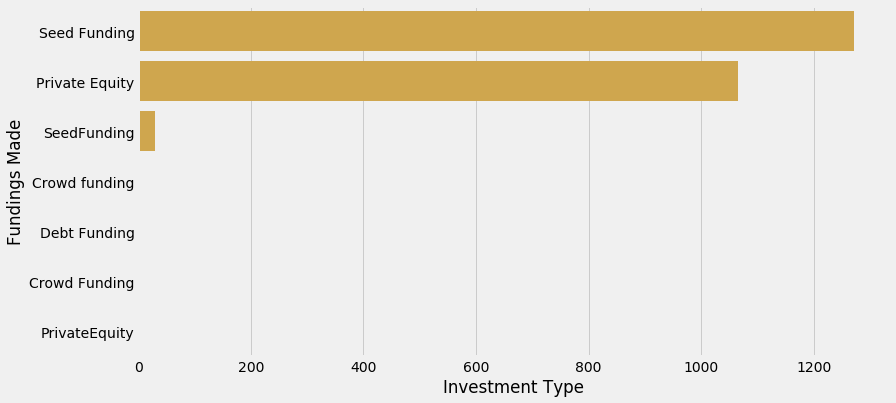

In [14]:
inty = data.InvestmentType.value_counts()
fig = plt.figure(figsize=(12,6))
p = sns.barplot(y=inty.index, x=inty.values, color=sns.color_palette()[2])
_ = p.set(xlabel='Investment Type', ylabel='Fundings Made')